In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import descartes
import geopandas as gpd
from shapely.geometry import Point, Polygon

#plotting settings
sns.set()
%matplotlib inline
# Display
pd.set_option('display.max_rows', 9999999999)
pd.set_option('display.max_columns', 9999999999)
pd.set_option('display.width', 9999999999)

In [118]:
ds = pd.read_csv('./csse_covid_19_data/csse_covid_19_daily_reports/02-26-2020.csv')
ds.head()

,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,Hubei,Mainland China,2020-02-26T14:13:10,65187,2615,20969
1,Guangdong,Mainland China,2020-02-26T10:33:02,1347,7,851
2,Henan,Mainland China,2020-02-26T10:33:02,1271,19,1033
3,NaN,South Korea,2020-02-26T11:03:11,1261,12,22
4,Zhejiang,Mainland China,2020-02-26T10:33:02,1205,1,867


In [119]:
ds1 = pd.read_csv('./csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv')
ds1.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20
0,Anhui,Mainland China,31.82571,117.2264,1,9,15,39,60,70,106,152,200,237,297,340,408,480,530,591,665,733,779,830,860,889,910,934,950,962,973,982,986,987,988,989,989,989,989
1,Beijing,Mainland China,40.18238,116.4142,14,22,36,41,68,80,91,111,114,139,168,191,212,228,253,274,297,315,326,337,342,352,366,372,375,380,381,387,393,395,396,399,399,399,400
2,Chongqing,Mainland China,30.05718,107.8740,6,9,27,57,75,110,132,147,182,211,247,300,337,366,389,411,426,428,468,486,505,518,529,537,544,551,553,555,560,567,572,573,575,576,576
3,Fujian,Mainland China,26.07783,117.9895,1,5,10,18,35,59,80,84,101,120,144,159,179,194,205,215,224,239,250,261,267,272,279,281,285,287,290,292,293,293,293,293,293,293,294
4,Gansu,Mainland China,36.06110,103.8343,0,2,2,4,7,14,19,24,26,29,40,51,55,57,62,62,67,79,83,83,86,87,90,90,90,90,91,91,91,91,91,91,91,91,91


In [120]:
ds1.isnull().sum()

Province/State    32
Country/Region     0
Lat                0
Long               0
1/22/20            0
1/23/20            0
1/24/20            0
1/25/20            0
1/26/20            0
1/27/20            0
1/28/20            0
1/29/20            0
1/30/20            0
1/31/20            0
2/1/20             0
2/2/20             0
2/3/20             0
2/4/20             0
2/5/20             0
2/6/20             0
2/7/20             0
2/8/20             0
2/9/20             0
2/10/20            0
2/11/20            0
2/12/20            0
2/13/20            0
2/14/20            0
2/15/20            0
2/16/20            0
2/17/20            0
2/18/20            0
2/19/20            0
2/20/20            0
2/21/20            0
2/22/20            0
2/23/20            0
2/24/20            0
2/25/20            0
dtype: int64

In [121]:
ds1_filter = pd.DataFrame(ds1, columns=['Country/Region','Lat','Long'])
ds1_filter.head()

,Country/Region,Lat,Long
0,Mainland China,31.82571,117.2264
1,Mainland China,40.18238,116.4142
2,Mainland China,30.05718,107.8740
3,Mainland China,26.07783,117.9895
4,Mainland China,36.06110,103.8343


In [122]:
ds2 = ds.merge(ds1_filter, on='Country/Region', how='inner')
ds2.head()

,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered,Lat,Long
0,Hubei,Mainland China,2020-02-26T14:13:10,65187,2615,20969,31.82571,117.2264
1,Hubei,Mainland China,2020-02-26T14:13:10,65187,2615,20969,40.18238,116.4142
2,Hubei,Mainland China,2020-02-26T14:13:10,65187,2615,20969,30.05718,107.8740
3,Hubei,Mainland China,2020-02-26T14:13:10,65187,2615,20969,26.07783,117.9895
4,Hubei,Mainland China,2020-02-26T14:13:10,65187,2615,20969,36.06110,103.8343


In [123]:
ds2.isnull().sum()

Province/State    34
Country/Region     0
Last Update        0
Confirmed          0
Deaths             0
Recovered          0
Lat                0
Long               0
dtype: int64

In [124]:
ds2.shape

(1322, 8)

In [299]:
ds2.head()

,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered,Lat,Long
0,Hubei,Mainland China,2020-02-26T14:13:10,65187,2615,20969,31.82571,117.2264
1,Hubei,Mainland China,2020-02-26T14:13:10,65187,2615,20969,40.18238,116.4142
2,Hubei,Mainland China,2020-02-26T14:13:10,65187,2615,20969,30.05718,107.8740
3,Hubei,Mainland China,2020-02-26T14:13:10,65187,2615,20969,26.07783,117.9895
4,Hubei,Mainland China,2020-02-26T14:13:10,65187,2615,20969,36.06110,103.8343


In [300]:
ds3 = ds2.groupby('Country/Region', axis=0, as_index=False).max()
ds3.head()

,Country/Region,Province/State,Last Update,Confirmed,Deaths,Recovered,Lat,Long
0,Afghanistan,NaN,2020-02-24T23:33:02,1,0,0,33.0000,65.0000
1,Algeria,NaN,2020-02-25T23:43:03,1,0,0,28.0339,1.6596
2,Australia,Victoria,2020-02-22T17:03:05,7,0,4,35.4437,153.0251
3,Austria,NaN,2020-02-26T00:13:06,2,0,0,47.5162,14.5501
4,Bahrain,NaN,2020-02-26T21:03:07,33,0,0,26.0275,50.5500


In [301]:
codvid_per_country = ds2.pivot_table(index=['Country/Region'], values = ['Province/State','Confirmed', 'Deaths', 'Recovered'],
                                     
                                     aggfunc='max')
codvid_per_country

,Confirmed,Deaths,Province/State,Recovered
Country/Region,,,,
Afghanistan,1,0,NaN,0
Algeria,1,0,NaN,0
Australia,7,0,Victoria,4
Austria,2,0,NaN,0
Bahrain,33,0,NaN,0
Belgium,1,0,NaN,1
Cambodia,1,0,NaN,1
Canada,7,0,"Toronto, ON",2
Croatia,3,0,NaN,0


In [355]:
codvid_per_country_top = codvid_per_country.sort_values(by='Deaths', ascending=False).nlargest(25, 'Deaths')
codvid_per_country_top = codvid_per_country_top.iloc[1:]
codvid_per_country_top

,Confirmed,Deaths,Province/State,Recovered
Country/Region,,,,
Iran,139,19,NaN,49
Italy,453,12,NaN,3
South Korea,1261,12,NaN,22
Others,705,4,Diamond Princess cruise ship,10
Japan,189,2,NaN,22
France,18,2,NaN,11
Hong Kong,91,2,Hong Kong,24
Taiwan,32,1,Taiwan,5
Philippines,3,1,NaN,1


In [340]:
ds3_top = ds3.sort_values(by='Deaths', ascending=False).nlargest(10, 'Deaths')
ds3_top

,Country/Region,Province/State,Last Update,Confirmed,Deaths,Recovered,Lat,Long
23,Mainland China,Zhejiang,2020-02-26T23:53:01,65187,2615,20969,47.8620,127.7622
15,Iran,NaN,2020-02-26T23:43:03,139,19,49,32.4279,53.6880
18,Italy,NaN,2020-02-26T23:43:03,453,12,3,41.8719,12.5674
31,South Korea,NaN,2020-02-26T11:03:11,1261,12,22,37.5665,126.9780
27,Others,Diamond Princess cruise ship,2020-02-26T19:33:02,705,4,10,35.4437,139.6380
19,Japan,NaN,2020-02-26T23:43:03,189,2,22,35.6762,139.6503
11,France,NaN,2020-02-26T20:03:06,18,2,11,46.2276,2.2137
13,Hong Kong,Hong Kong,2020-02-26T23:43:02,91,2,24,22.3193,114.1694
36,Taiwan,Taiwan,2020-02-26T12:23:04,32,1,5,23.6978,120.9605
28,Philippines,NaN,2020-02-12T07:43:02,3,1,1,12.8797,121.7740


In [294]:
ds3_top1 = ds3_top[['Country/Region', 'Province/State', 'Confirmed', 'Deaths','Recovered']]
ds3_top1

,Country/Region,Province/State,Confirmed,Deaths,Recovered
15,Iran,NaN,139,19,49
18,Italy,NaN,453,12,3
31,South Korea,NaN,1261,12,22
27,Others,Diamond Princess cruise ship,705,4,10
19,Japan,NaN,189,2,22
11,France,NaN,18,2,11
13,Hong Kong,Hong Kong,91,2,24
36,Taiwan,Taiwan,32,1,5
28,Philippines,NaN,3,1,1
38,UK,NaN,13,0,8


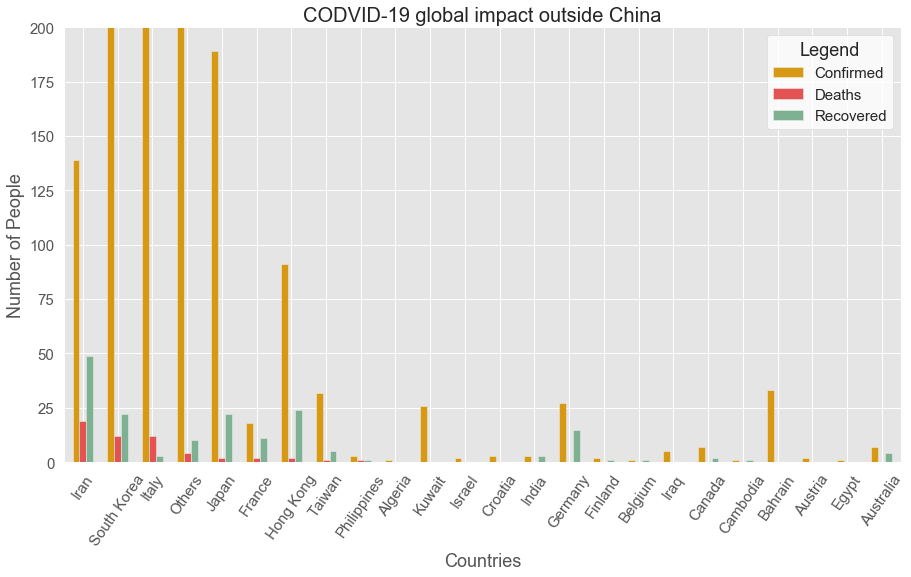

In [358]:
codvid_per_country_top.sort_values(by=['Deaths'], ascending=False).plot.bar(figsize = (15, 8), width=0.6, align='center', color = ['#D79913', '#E35353', '#7DB192'])

plt.ylabel('Number of People', fontsize=18)
plt.ylim(0, 200)
plt.xlabel('Countries', fontsize=18)
plt.title('CODVID-19 global impact outside China', fontsize=20)
plt.style.use('ggplot')

plt.xticks(fontsize=15, rotation=55)
plt.yticks(fontsize=15)
plt.legend(fontsize=15, loc=0, facecolor = 'white', title = 'Legend', title_fontsize = 18)

plt.savefig('codvid_global_matplotlib.jpg', dpi=480)
plt.show()

In [345]:
ds_china = ds2.pivot_table(index=['Province/State'], values = ['Country/Region','Confirmed', 'Deaths', 'Recovered'],
                                     
                                     aggfunc='max')
ds_china = ds_china[ds_china['Country/Region'] == 'Mainland China']
ds_china

,Confirmed,Country/Region,Deaths,Recovered
Province/State,,,,
Anhui,989,Mainland China,6,744
Beijing,400,Mainland China,4,235
Chongqing,576,Mainland China,6,384
Fujian,294,Mainland China,1,218
Gansu,91,Mainland China,2,81
Guangdong,1347,Mainland China,7,851
Guangxi,252,Mainland China,2,147
Guizhou,146,Mainland China,2,104
Hainan,168,Mainland China,5,129


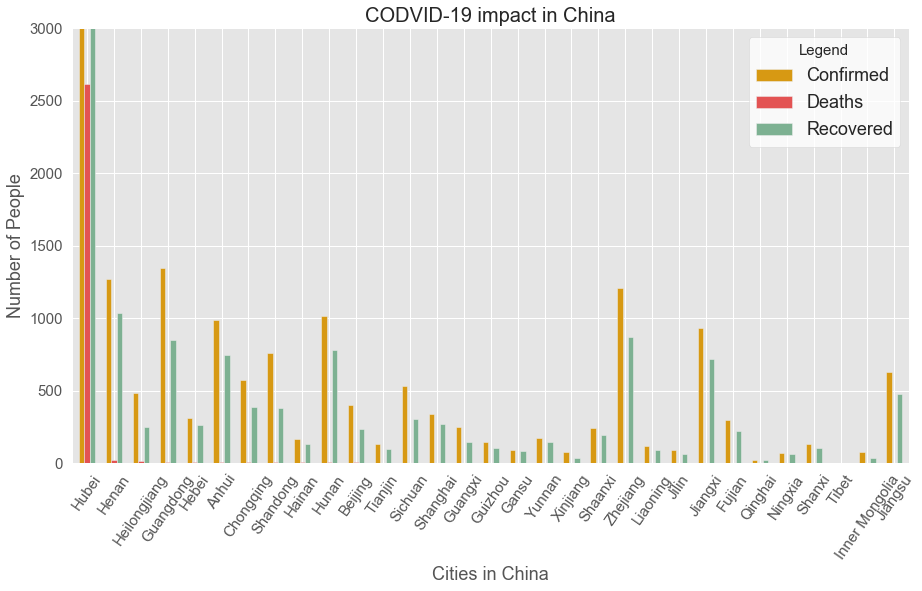

In [352]:
ds_china.sort_values(by=['Deaths'], ascending=False).plot.bar(figsize = (15, 8), width=0.6, align='center', color = ['#D79913', '#E35353', '#7DB192'])

plt.ylabel('Number of People', fontsize=18)
plt.ylim(0, 3000)
plt.xlabel('Cities in China', fontsize=18)
plt.title('CODVID-19 impact in China', fontsize=20)
plt.style.use('ggplot')

plt.xticks(fontsize=15, rotation=55)
plt.yticks(fontsize=15)
plt.legend(fontsize=18, loc=0, facecolor = 'white', title = 'Legend', title_fontsize = 15)

plt.savefig('codvid_China_matplotlib.jpg', dpi=480)
plt.show()

In [373]:
world_map = gpd.read_file('./Countries_WGS84/Countries_WGS84.shp')


In [400]:
ds2

,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered,Lat,Long
0,Hubei,Mainland China,2020-02-26T14:13:10,65187,2615,20969,31.82571,117.22640
1,Hubei,Mainland China,2020-02-26T14:13:10,65187,2615,20969,40.18238,116.41420
2,Hubei,Mainland China,2020-02-26T14:13:10,65187,2615,20969,30.05718,107.87400
3,Hubei,Mainland China,2020-02-26T14:13:10,65187,2615,20969,26.07783,117.98950
4,Hubei,Mainland China,2020-02-26T14:13:10,65187,2615,20969,36.06110,103.83430
5,Hubei,Mainland China,2020-02-26T14:13:10,65187,2615,20969,23.33841,113.42200
6,Hubei,Mainland China,2020-02-26T14:13:10,65187,2615,20969,23.82908,108.78810
7,Hubei,Mainland China,2020-02-26T14:13:10,65187,2615,20969,26.81536,106.87480
8,Hubei,Mainland China,2020-02-26T14:13:10,65187,2615,20969,19.19673,109.74550
9,Hubei,Mainland China,2020-02-26T14:13:10,65187,2615,20969,38.04280,114.51490


In [401]:
# designate coordinate system
crs = {'init' :'epsg:4326'}
# zip x and y coordinates into single feature
geometry = [Point(xy) for xy in zip(ds2['Long'], ds2['Lat'])]
# create GeoPandas dataframe
geo_df = gpd.GeoDataFrame(ds2, crs = crs, geometry = geometry)

In [402]:
geo_df

,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered,Lat,Long,geometry
0,Hubei,Mainland China,2020-02-26T14:13:10,65187,2615,20969,31.82571,117.22640,POINT (117.22640 31.82571)
1,Hubei,Mainland China,2020-02-26T14:13:10,65187,2615,20969,40.18238,116.41420,POINT (116.41420 40.18238)
2,Hubei,Mainland China,2020-02-26T14:13:10,65187,2615,20969,30.05718,107.87400,POINT (107.87400 30.05718)
3,Hubei,Mainland China,2020-02-26T14:13:10,65187,2615,20969,26.07783,117.98950,POINT (117.98950 26.07783)
4,Hubei,Mainland China,2020-02-26T14:13:10,65187,2615,20969,36.06110,103.83430,POINT (103.83430 36.06110)
5,Hubei,Mainland China,2020-02-26T14:13:10,65187,2615,20969,23.33841,113.42200,POINT (113.42200 23.33841)
6,Hubei,Mainland China,2020-02-26T14:13:10,65187,2615,20969,23.82908,108.78810,POINT (108.78810 23.82908)
7,Hubei,Mainland China,2020-02-26T14:13:10,65187,2615,20969,26.81536,106.87480,POINT (106.87480 26.81536)
8,Hubei,Mainland China,2020-02-26T14:13:10,65187,2615,20969,19.19673,109.74550,POINT (109.74550 19.19673)
9,Hubei,Mainland China,2020-02-26T14:13:10,65187,2615,20969,38.04280,114.51490,POINT (114.51490 38.04280)


No handles with labels found to put in legend.


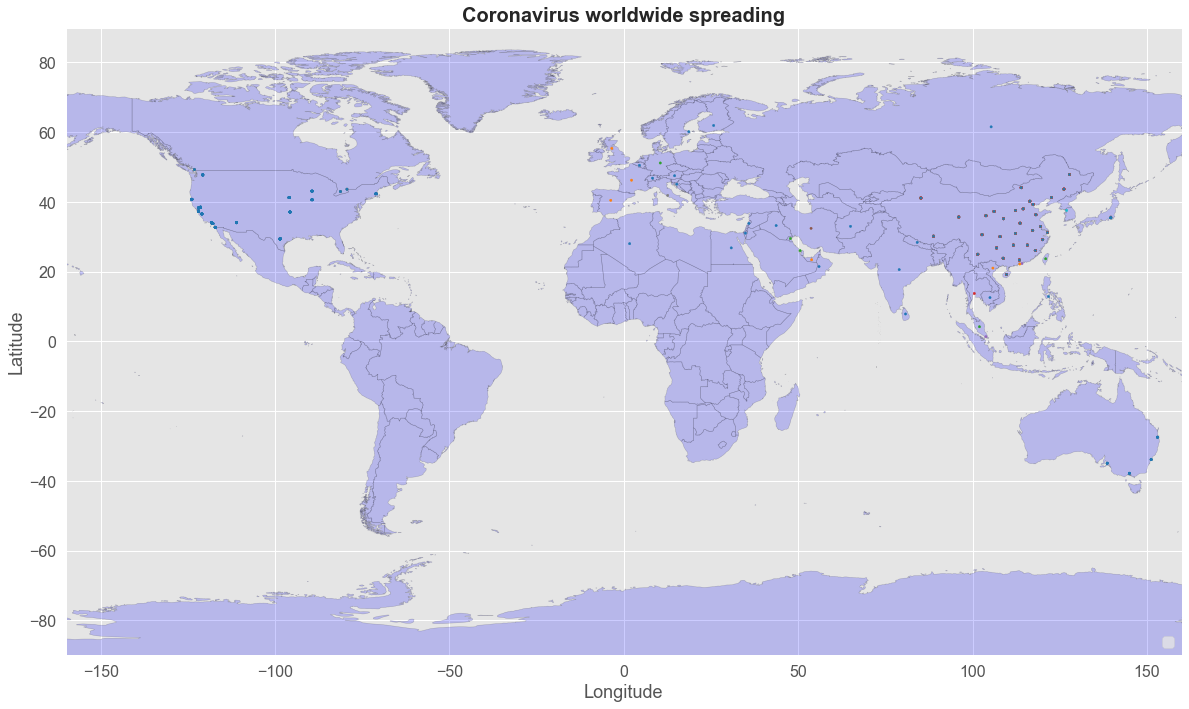

In [477]:
fig, ax = plt.subplots(figsize=(20,15))

world_map.plot(ax=ax, alpha=0.2, color='blue', edgecolor='black')

geo_df.plot(column='Confirmed', ax=ax, markersize=5, legend=True, categorical=True)

'''geo_df.plot(column='Deaths', ax=ax, markersize=5, legend=False, color='red',
           legend_kwds={'label': "Deaths",
                         'orientation': "horizontal"})

geo_df.plot(column='Recovered', ax=ax, markersize=5, legend=False, color='green',
           legend_kwds={'label': "Recovered",
                         'orientation': "horizontal"})'''
plt.xlim(-160, 160)
plt.ylim(-90,90)
plt.title('Coronavirus worldwide spreading', fontsize=20, fontweight='bold')
plt.ylabel('Latitude', fontsize=18)
plt.xlabel('Longitude', fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

ax.legend(loc='lower right',
          fontsize=15,
          frameon=True)

plt.savefig('codvid_global_map.jpg', dpi=480)
plt.show()